In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
#Sets the api url and desired information type
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Builds a partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Creates empty lists to append later
names = []
clouds = []
countries = []
dates = []
humidities = []
lats = []
lons = []
maxTemps = []
windSpds = []

#Sets variables to keep track of city and error numbers
cityNumber = 0
errorNumber = 0

#Loops through every city and saves desired data into lists
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lons.append(response['coord']['lon'])
        maxTemps.append(response['main']['temp_max'])
        windSpds.append(response['wind']['speed'])
        names.append(response['name'])
        
        #Creates and prints the city number alongside its associated city
        cityNumber += 1
        print(f"({cityNumber}): {city}")
        
    except KeyError:
        #Creates and prints the error number alongside its associated city
        errorNumber += 1
        print(f"ERROR {errorNumber}: {city}")


#Prints a summary of the for-loop
print("---------------------------------------")
print(f"{cityNumber} cities successfully logged")
print(f"{errorNumber} errors returned")

ERROR 1: taolanaro
(1): dikson
(2): les escoumins
(3): pisco
(4): tiksi
(5): olga
(6): nanortalik
(7): hermanus
(8): bethel
(9): jamestown
(10): katerero
(11): busselton
(12): saskylakh
(13): quesnel
(14): ponta do sol
(15): chokurdakh
(16): bluff
(17): marsabit
(18): new norfolk
(19): brunswick
ERROR 2: satitoa
(20): pangnirtung
(21): cape town
ERROR 3: samusu
(22): dalvik
(23): maliq
(24): rikitea
(25): punta arenas
(26): hualmay
ERROR 4: guimar
(27): kavaratti
(28): longyearbyen
(29): hilo
(30): klaksvik
ERROR 5: crab hill
(31): barrow
(32): monte santo
(33): grand gaube
(34): ust-ilimsk
(35): waihi beach
(36): mataura
(37): aksu
(38): atuona
ERROR 6: belushya guba
(39): carnarvon
(40): tasiilaq
ERROR 7: grand river south east
(41): vaini
(42): beloha
(43): vila
(44): upernavik
(45): puerto ayora
(46): sao joao da barra
(47): auki
(48): deputatskiy
(49): north bend
(50): saint-philippe
ERROR 8: vaitupu
(51): lodwar
(52): buala
(53): qaanaaq
(54): avarua
(55): katsuura
(56): acari
(5

(443): morondava
(444): elmira
(445): tandil
(446): nisia floresta
ERROR 62: phan rang
(447): mantua
(448): port lincoln
(449): xuddur
ERROR 63: kuche
(450): sosnovoborsk
(451): camopi
(452): lagos
(453): mount gambier
(454): tonantins
(455): havelock
(456): tomatlan
(457): kruisfontein
(458): grindavik
(459): kysyl-syr
(460): haines junction
(461): lethem
(462): boa vista
(463): evensk
(464): xingcheng
(465): sorland
(466): olhao
(467): pangody
(468): solvychegodsk
(469): karratha
(470): erenhot
(471): karaton
(472): tyup
(473): kahului
(474): bajil
(475): lata
(476): tilichiki
(477): havoysund
(478): moba
(479): pontianak
(480): faya
(481): san pedro
(482): port augusta
(483): paracuru
ERROR 64: zanatepec
(484): aketi
(485): honiara
(486): portland
(487): concarneau
(488): miyako
(489): zhezkazgan
(490): fomboni
ERROR 65: amderma
(491): khandyga
(492): cam ranh
(493): constantine
(494): belaya kalitva
(495): port hawkesbury
(496): acapulco
(497): nizwa
(498): hokitika
ERROR 66: kemij

In [4]:
#Creates a dictionary using the list data gathered from the weather api
weatherDict = {"City": names,
              "Cloudiness": clouds,
              "Country": countries,
              "Date": dates,
              "Humidity": humidities,
              "Lat": lats,
              "Lng": lons,
              "Max Temp": maxTemps,
              "Wind Speed": windSpds}

#Converts the dictionary into a dataframe
weatherData = pd.DataFrame(weatherDict)

#Displays the dataframe
weatherData.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,88,RU,1540663710,100,73.51,80.55,24.10,36.60
1,Les Escoumins,0,CA,1540663710,38,48.35,-69.40,31.39,3.60
2,Pisco,40,PE,1540659600,72,-13.71,-76.20,68.00,10.29
3,Tiksi,0,RU,1540663710,72,71.64,128.87,10.69,14.00
4,Olga,1,US,1540661940,100,34.11,-118.17,77.00,3.36


In [5]:
#Saves the weather dataframe as a .csv
weatherData.to_csv("weatherData.csv")

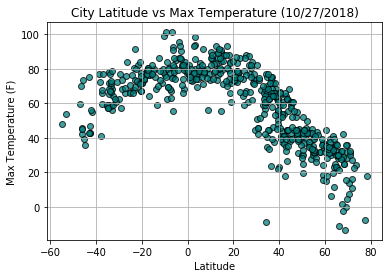

In [6]:
#Creates the temperature scatterplot
plt.scatter(lats, maxTemps, marker="o", facecolors="teal", edgecolors="black", alpha = 0.75)

#Adds additional formatting to the temperature plot
plt.grid()
plt.title("City Latitude vs Max Temperature (10/27/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Displays the temperature plot
plt.show()

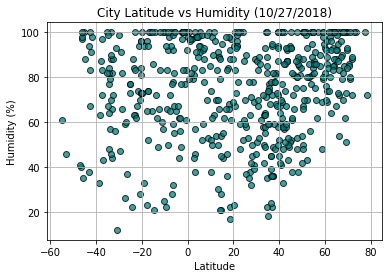

In [7]:
#Creates the humidity scatterplot
plt.scatter(lats, humidities, marker="o", facecolors="teal", edgecolors="black", alpha = 0.75)

#Adds additional formatting to the humidity plot
plt.grid()
plt.title("City Latitude vs Humidity (10/27/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Displays the humidity plot
plt.show()

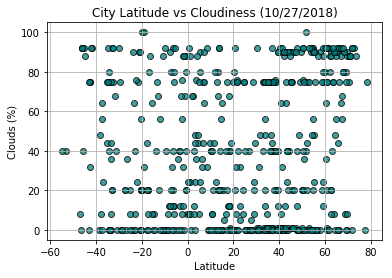

In [8]:
#Creates the cloudiness scatterplot
plt.scatter(lats, clouds, marker="o", facecolors="teal", edgecolors="black", alpha = 0.75)

#Adds additional formatting to the cloudiness plot
plt.grid()
plt.title("City Latitude vs Cloudiness (10/27/2018)")
plt.xlabel("Latitude")
plt.ylabel("Clouds (%)")

#Displays the cloudiness plot
plt.show()

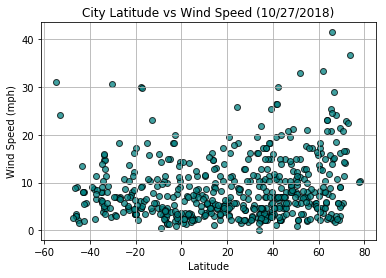

In [9]:
#Creates the wind speed scatterplot
plt.scatter(lats, windSpds, marker="o", facecolors="teal", edgecolors="black", alpha = 0.75)

#Adds additional formatting to the wind speed plot
plt.grid()
plt.title("City Latitude vs Wind Speed (10/27/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Displays the wind speed plot
plt.show()